In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
### Loading Gapminder Dataset
gapminder = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')

In [3]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [7]:
gapminder.tail(10)

,country,continent,year,lifeExp,pop,gdpPercap
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071
1696,Zimbabwe,Africa,1972,55.635,5861135,799.362176
1697,Zimbabwe,Africa,1977,57.674,6642107,685.587682
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


##  Countries Having Life Expectancy Lower than 40 Million & Population Larger than 50 Million¶

In [8]:
LF=(gapminder['lifeExp']<=40)&(gapminder['pop']>50000000)
gapminder[LF]

,country,continent,year,lifeExp,pop,gdpPercap
97,Bangladesh,Asia,1957,39.348,51365468,661.637458
696,India,Asia,1952,37.373,372000000,546.565749
708,Indonesia,Asia,1952,37.468,82052000,749.681655
709,Indonesia,Asia,1957,39.918,90124000,858.900271


## Life Expectancy in Descending Order

In [9]:
gapminder.sort_values('lifeExp', ascending=False)

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
802,Japan,Asia,2002,82.000,127065841,28604.591900
695,Iceland,Europe,2007,81.757,301931,36180.789190
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736
36,Angola,Africa,1952,30.015,4232095,3520.610273
552,Gambia,Africa,1952,30.000,284320,485.230659
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


## Population & GDP per capita of Japan : Evolution of Life Expectancy

In [10]:
LF=gapminder['country']=='Japan'

In [11]:
LF

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [12]:
Y=gapminder[LF][['lifeExp','pop','gdpPercap','year']]

Text(0, 0.5, 'Year')

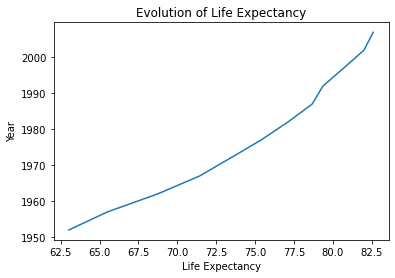

In [13]:
ax=sns.lineplot(data=Y, x='lifeExp', y='year')
ax.set_title('Evolution of Life Expectancy')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Year')

Text(0, 0.5, 'Year')

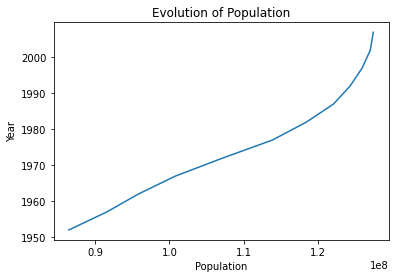

In [14]:
ax=sns.lineplot(data=Y, x='pop', y='year')
ax.set_title('Evolution of Population')
ax.set_xlabel('Population')
ax.set_ylabel('Year')

Text(0, 0.5, 'Year')

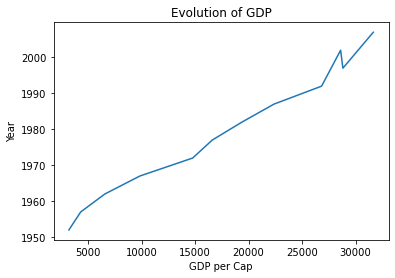

In [15]:
ax=sns.lineplot(data=Y, x='gdpPercap', y='year')
ax.set_title('Evolution of GDP')
ax.set_xlabel('GDP per Cap')
ax.set_ylabel('Year')

## Plotting Relationship between Life Expectancy and GDP in Japan

Text(0, 0.5, 'GDP per Cap')

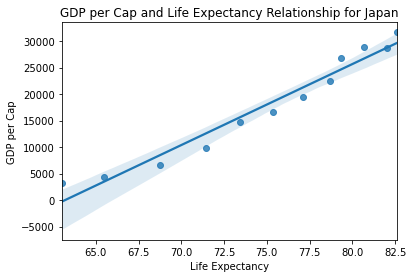

In [16]:
ax=sns.regplot(x='lifeExp',y='gdpPercap',data=Y)
ax.set_title('GDP per Cap and Life Expectancy Relationship for Japan')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('GDP per Cap')

#### Above graph shows siginificant relationship between GDP and Life Expectancy.It can be intrepreted from above graph Life Expectancy is increasing in proporation with GDP per Capita

## Plotting Relationship between Life Expectancy and Population in Japan

Text(0, 0.5, 'Population')

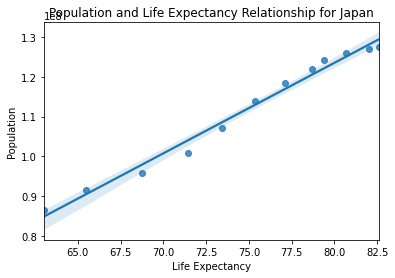

In [21]:
ax=sns.regplot(x='lifeExp', y='pop', data=Y)
ax.set_title('Population and Life Expectancy Relationship for Japan')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Population')

#### Above graph shows important relationship between Life Expectancy and Poulation. It can pe interpreted from above graph as population increases, life expectancy also increases 